In [ ]:
# Load and examine the data
import pandas as pd
import numpy as np

# Read the CSV file
df = pd.read_csv('Coca-Cola_stock_history - Copy.csv')

# Display initial info about the dataset
print('Initial Dataset Info:')
print(df.info())
print('\
Missing Values:')
print(df.isnull().sum())
print('\
First few rows:')
print(df.head())

Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8819 entries, 0 to 8818
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          8819 non-null   object 
 1   Open          8819 non-null   float64
 2   High          8819 non-null   float64
 3   Low           8819 non-null   float64
 4   Close         8819 non-null   float64
 5   Volume        8819 non-null   int64  
 6   Dividends     8819 non-null   float64
 7   Stock Splits  8819 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 551.3+ KB
None
Missing Values:
Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
First few rows:
         Date      Open      High       Low     Close    Volume  Dividends  \
0  1990-01-02  2.263166  2.285139  2.248518  2.285139  12128000        0.0   
1  1990-01-03  2.281477  2.2

In [ ]:
# Clean the data
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Check for any rows with invalid dates or anomalies
invalid_dates = df[df['Date'].isnull()]

# Display invalid dates if any
if not invalid_dates.empty:
    print('Rows with invalid dates:')
    print(invalid_dates)
else:
    print('All dates are valid.')

# Ensure numeric columns are properly formatted
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Check for any rows with missing or invalid numeric data
missing_numeric_data = df[df[numeric_columns].isnull().any(axis=1)]

# Display rows with missing numeric data if any
if not missing_numeric_data.empty:
    print('Rows with missing or invalid numeric data:')
    print(missing_numeric_data)
else:
    print('All numeric data is valid.')

All dates are valid.
All numeric data is valid.


The data looks clean with:



*   No missing values
*   Proper datetime format for dates
*   Valid numeric data across all columns
*   No anomalies detected











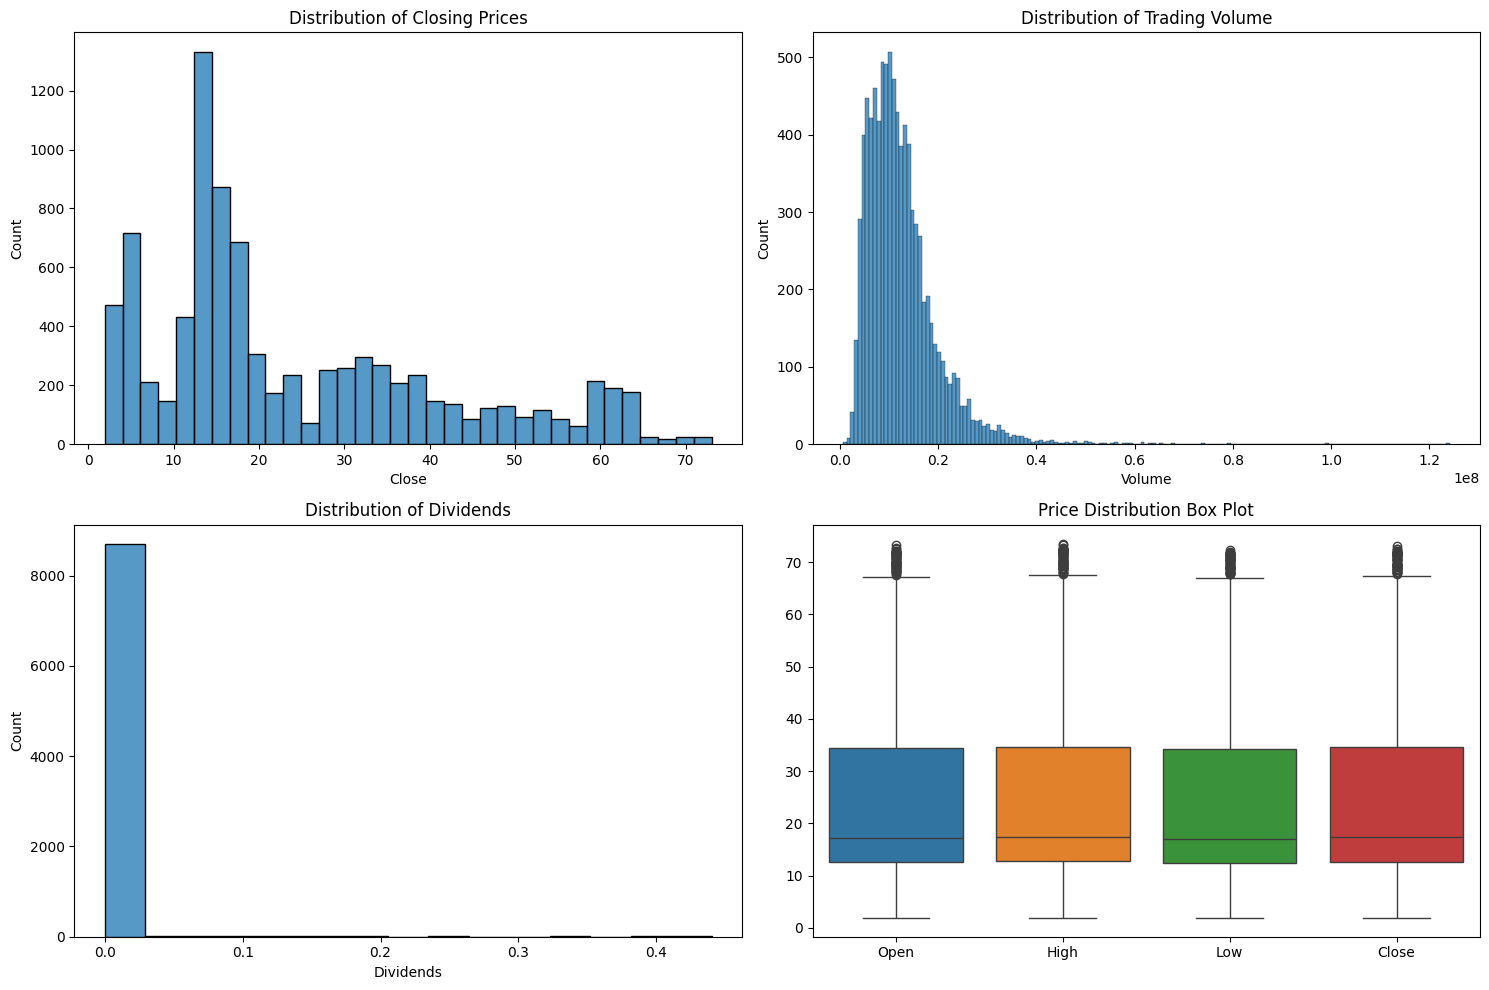

Summary Statistics:
                                Date         Open         High          Low  \
count                           8819  8819.000000  8819.000000  8819.000000   
mean   2007-06-28 02:09:48.638167552    24.065993    24.248865    23.877754   
min              1990-01-02 00:00:00     1.955554     1.984848     1.911607   
25%              1998-09-21 12:00:00    12.628672    12.732729    12.507891   
50%              2007-06-28 00:00:00    17.301870    17.485224    17.068528   
75%              2016-03-31 12:00:00    34.489197    34.708144    34.290094   
max              2025-01-03 00:00:00    73.300003    73.529999    72.250000   
std                              NaN    17.165784    17.268374    17.056789   

             Close        Volume    Dividends  Stock Splits  
count  8819.000000  8.819000e+03  8819.000000   8819.000000  
mean     24.069869  1.248652e+07     0.002807      0.000907  
min       1.940903  5.816000e+05     0.000000      0.000000  
25%      12.633238  

In [ ]:
# Univariate Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Create histograms for numerical columns
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(data=df['Close'], ax=axes[0,0])
axes[0,0].set_title('Distribution of Closing Prices')
sns.histplot(data=df['Volume'], ax=axes[0,1])
axes[0,1].set_title('Distribution of Trading Volume')
sns.histplot(data=df['Dividends'], ax=axes[1,0])
axes[1,0].set_title('Distribution of Dividends')
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']], ax=axes[1,1])
axes[1,1].set_title('Price Distribution Box Plot')
plt.tight_layout()
plt.show()

# Basic statistics
print('\
Summary Statistics:')
print(df.describe())

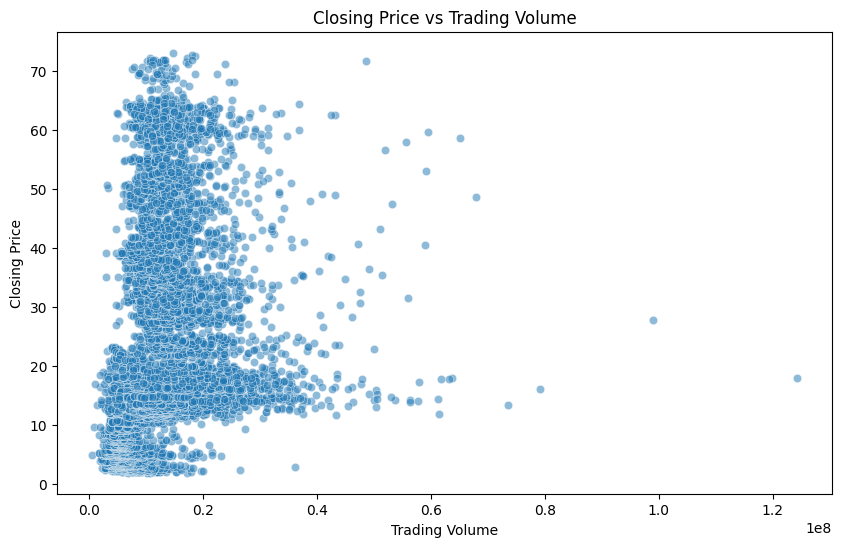

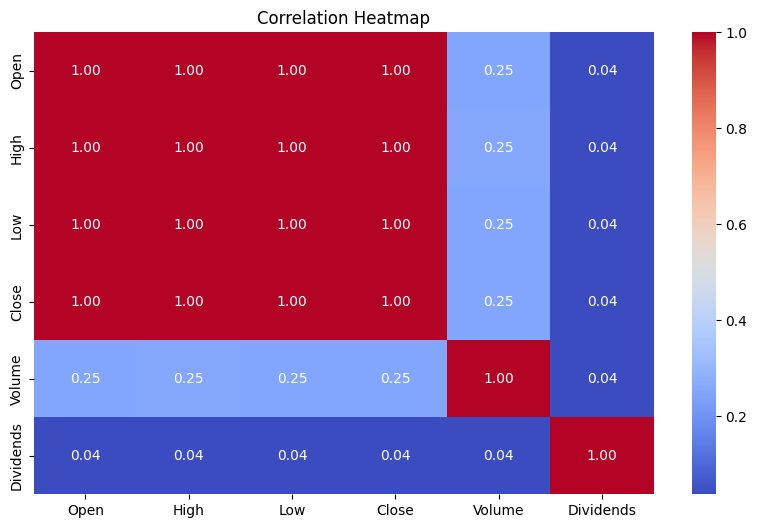

In [ ]:
# Bivariate Analysis
# Scatter plot for Closing Price vs Volume
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Volume', y='Close', data=df, alpha=0.5)
plt.title('Closing Price vs Trading Volume')
plt.xlabel('Trading Volume')
plt.ylabel('Closing Price')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

<Figure size 1200x800 with 0 Axes>

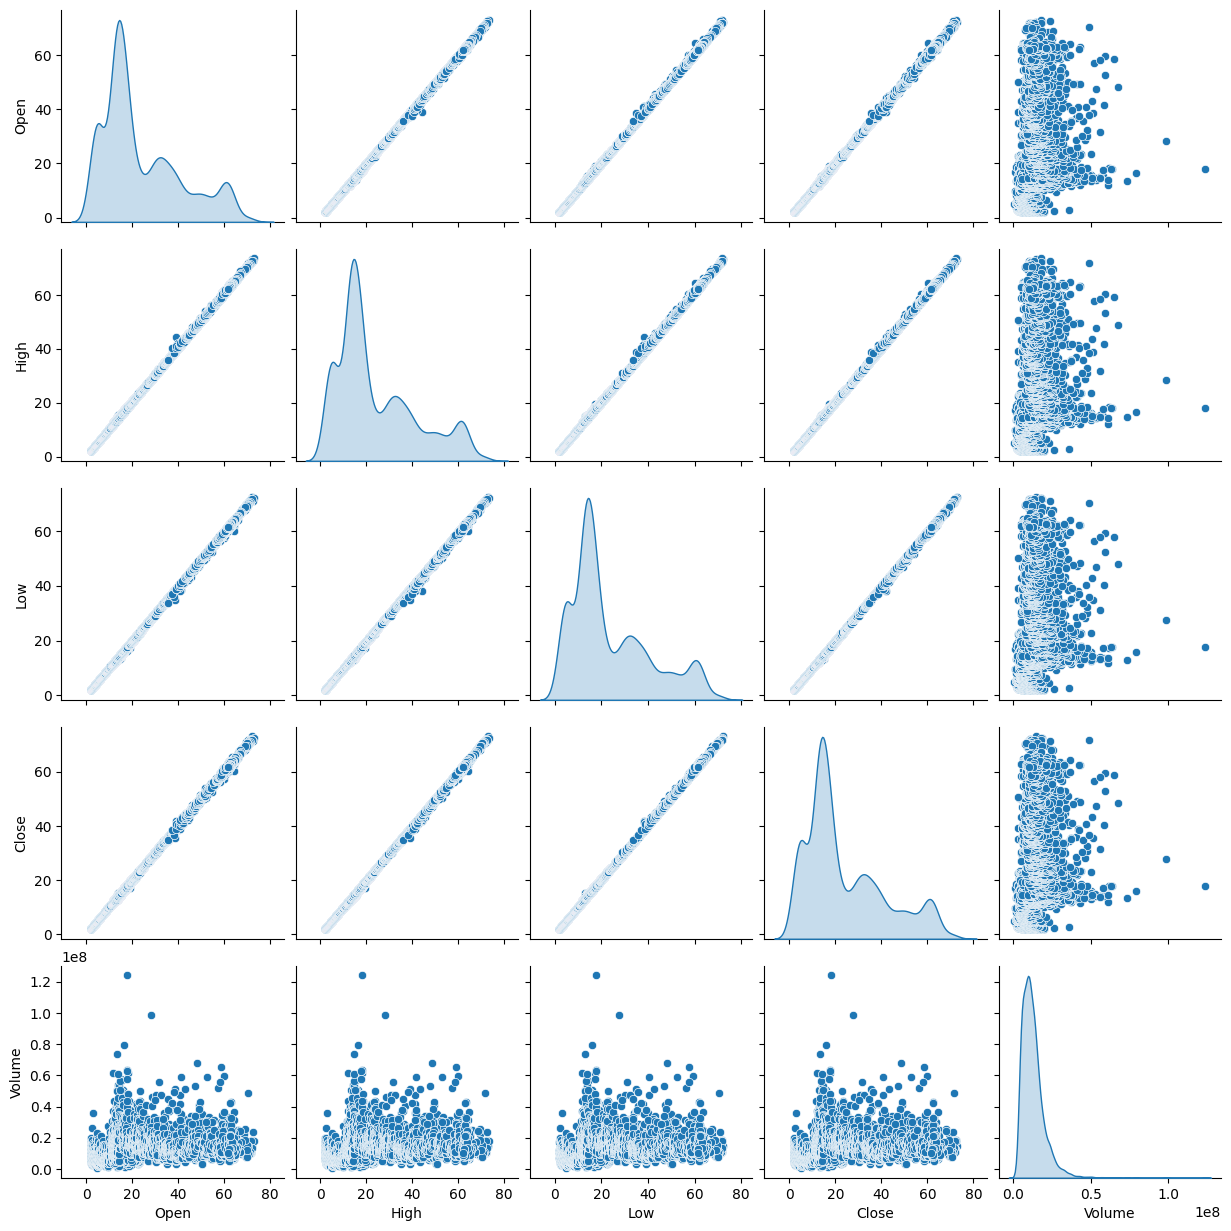

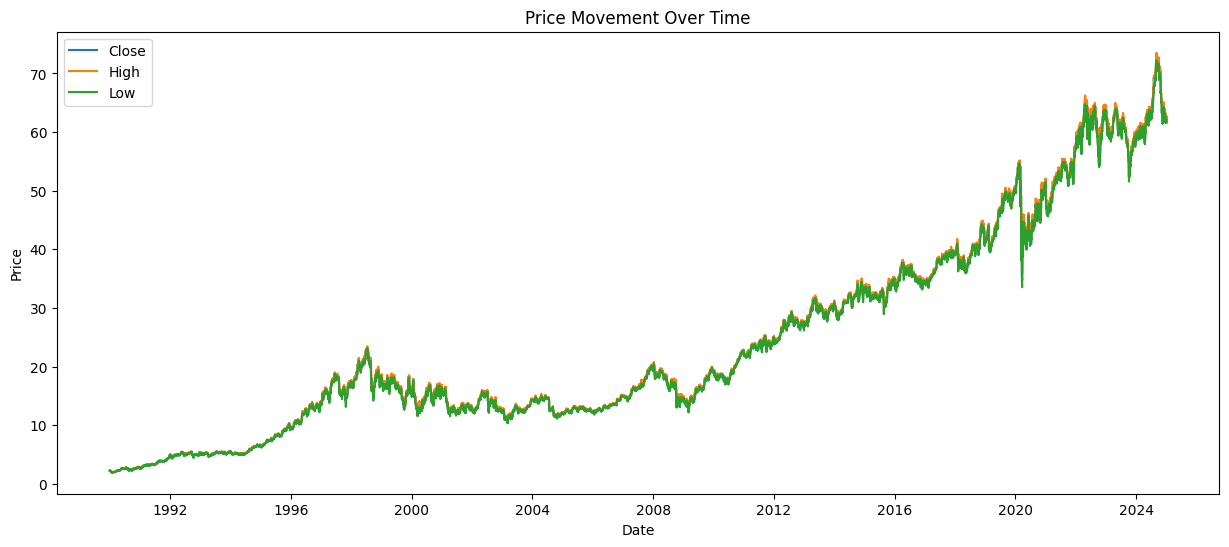

In [ ]:
# Multivariate Analysis
# Create a pair plot for key variables
plt.figure(figsize=(12, 8))
sns.pairplot(df[['Open', 'High', 'Low', 'Close', 'Volume']], diag_kind='kde')
plt.show()

# Time series analysis of prices
plt.figure(figsize=(15, 6))
plt.plot(df['Date'], df['Close'], label='Close')
plt.plot(df['Date'], df['High'], label='High')
plt.plot(df['Date'], df['Low'], label='Low')
plt.title('Price Movement Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Based on the analysis:



*   The stock price has shown significant growth over time, with prices ranging from around 2USD in 1990 to over 70USD in recent years
*  Strong positive correlations exist between Open, High, Low, and Close prices (>0.99)

*   Volume shows weak correlation with price movements
*   Dividends have been consistently paid but vary in amount

*   The distribution of prices shows right-skewed patterns, indicating more frequent smaller price movements than large ones












In [ ]:
# Feature Engineering
# Create new features: Daily Returns, Moving Averages, and Volatility

df['Daily_Return'] = df['Close'].pct_change()  # Daily percentage change

df['MA_10'] = df['Close'].rolling(window=10).mean()  # 10-day moving average
df['MA_50'] = df['Close'].rolling(window=50).mean()  # 50-day moving average

df['Volatility'] = df['Close'].rolling(window=10).std()  # 10-day rolling standard deviation

# Display the updated dataset with new features
print('Updated Dataset with New Features:')
print(df[['Date', 'Close', 'Daily_Return', 'MA_10', 'MA_50', 'Volatility']].head(15))

Updated Dataset with New Features:
         Date     Close  Daily_Return     MA_10  MA_50  Volatility
0  1990-01-02  2.285139           NaN       NaN    NaN         NaN
1  1990-01-03  2.252181     -0.014423       NaN    NaN         NaN
2  1990-01-04  2.241194     -0.004878       NaN    NaN         NaN
3  1990-01-05  2.222883     -0.008170       NaN    NaN         NaN
4  1990-01-08  2.270491      0.021417       NaN    NaN         NaN
5  1990-01-09  2.252181     -0.008065       NaN    NaN         NaN
6  1990-01-10  2.237533     -0.006504       NaN    NaN         NaN
7  1990-01-11  2.237533      0.000000       NaN    NaN         NaN
8  1990-01-12  2.156967     -0.036007       NaN    NaN         NaN
9  1990-01-15  2.120346     -0.016978  2.227645    NaN    0.050833
10 1990-01-16  2.138657      0.008636  2.212997    NaN    0.053462
11 1990-01-17  2.124007     -0.006850  2.200179    NaN    0.058180
12 1990-01-18  2.113021     -0.005172  2.187362    NaN    0.062125
13 1990-01-19  2.127670    

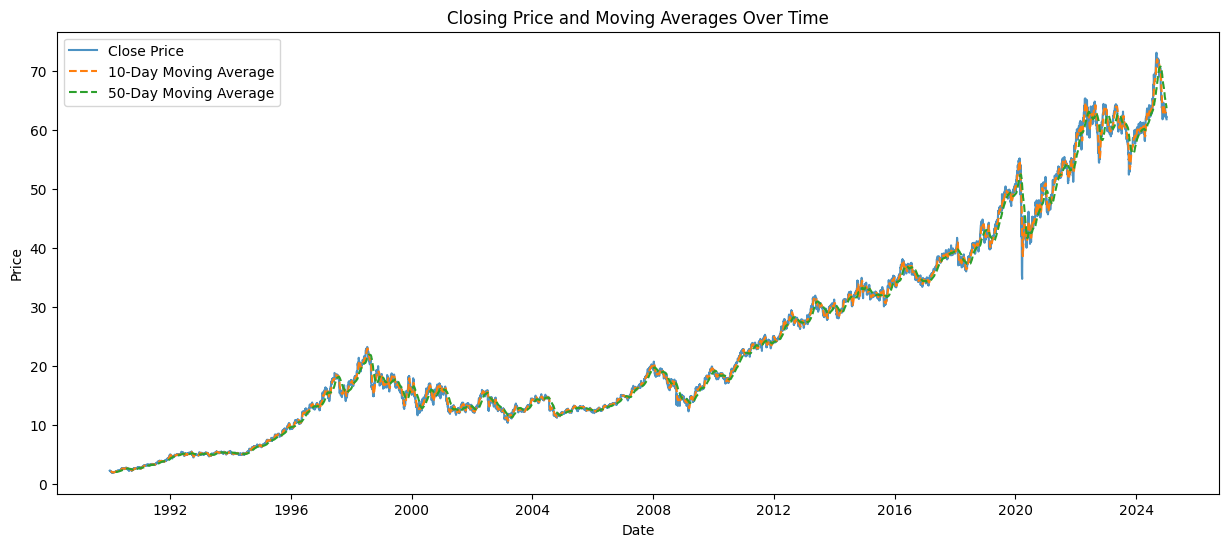

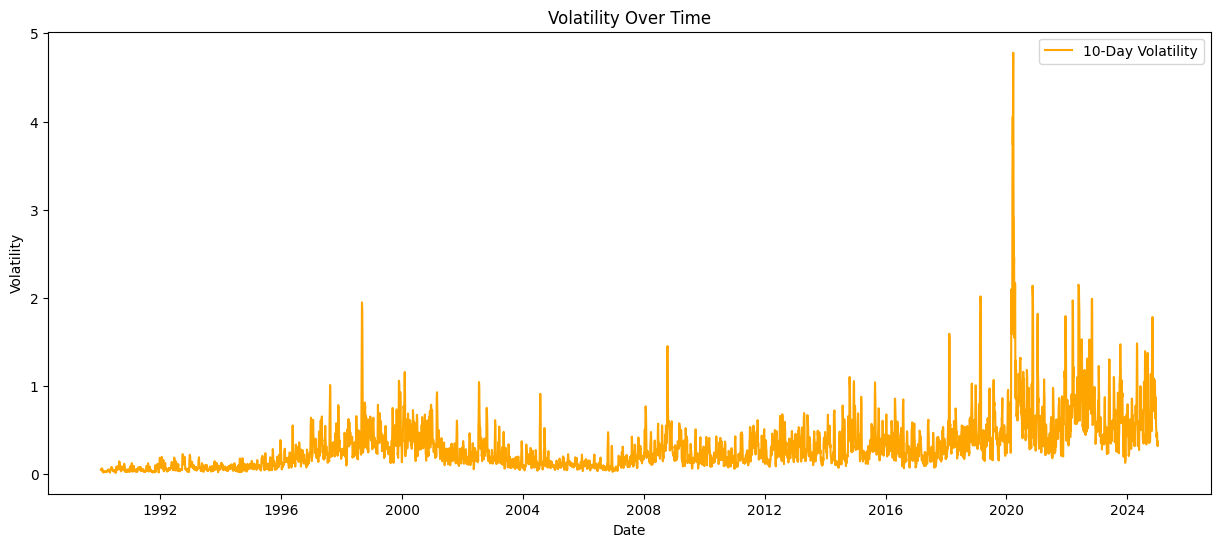

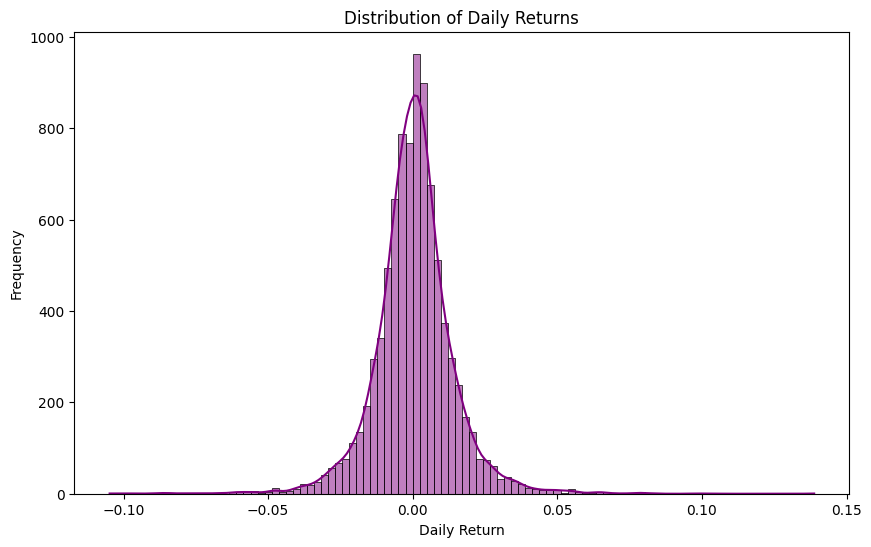

In [ ]:
# Analyze the new features
# Plot the moving averages and closing price over time
plt.figure(figsize=(15, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', alpha=0.8)
plt.plot(df['Date'], df['MA_10'], label='10-Day Moving Average', linestyle='--')
plt.plot(df['Date'], df['MA_50'], label='50-Day Moving Average', linestyle='--')
plt.title('Closing Price and Moving Averages Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot volatility over time
plt.figure(figsize=(15, 6))
plt.plot(df['Date'], df['Volatility'], label='10-Day Volatility', color='orange')
plt.title('Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

# Plot daily returns distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Daily_Return'].dropna(), bins=100, kde=True, color='purple')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

Null Values Count:
Date             0
Open             0
High             0
Low              0
Close            0
Volume           0
Dividends        0
Stock Splits     0
Daily_Return     1
MA_10            9
MA_50           49
Volatility       9
dtype: int64
Number of Outliers:
Open: 59
High: 62
Low: 57
Close: 60
Volume: 344
Multicollinearity (Correlation Matrix):
           Open      High       Low     Close
Open   1.000000  0.999932  0.999917  0.999858
High   0.999932  1.000000  0.999893  0.999928
Low    0.999917  0.999893  1.000000  0.999932
Close  0.999858  0.999928  0.999932  1.000000


<ipython-input-12-0548b35e7a9f>:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['MA_10'] = df['MA_10'].fillna(method='bfill')
<ipython-input-12-0548b35e7a9f>:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['MA_50'] = df['MA_50'].fillna(method='bfill')


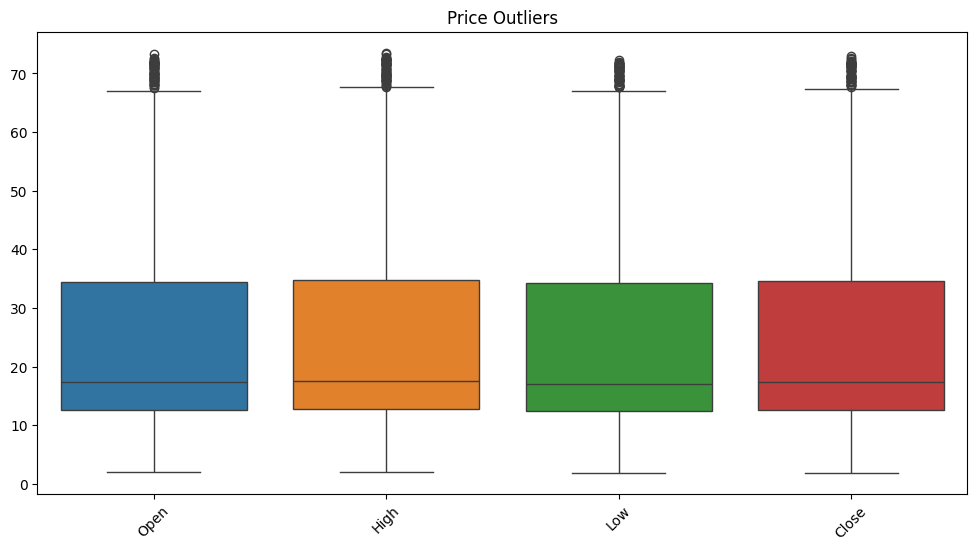

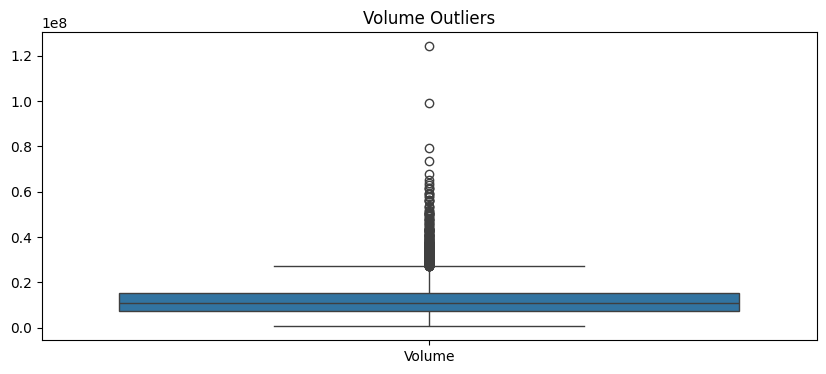

In [ ]:
# Check null values
print("Null Values Count:")
print(df.isnull().sum())

# Handle null values in moving averages (these are expected due to rolling window)
df['MA_10'] = df['MA_10'].fillna(method='bfill')
df['MA_50'] = df['MA_50'].fillna(method='bfill')
df['Daily_Return'] = df['Daily_Return'].fillna(0)

# Check for outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return len(outliers)

print("\
Number of Outliers:")
for column in ['Open', 'High', 'Low', 'Close', 'Volume']:
    print(f"{column}: {detect_outliers(df, column)}")

# Check multicollinearity
correlation_matrix = df[['Open', 'High', 'Low', 'Close']].corr()
print("\
Multicollinearity (Correlation Matrix):")
print(correlation_matrix)

# Visualize outliers with box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']])
plt.title('Price Outliers')
plt.xticks(rotation=45)
plt.show()

# Volume outliers
plt.figure(figsize=(10, 4))
sns.boxplot(data=df[['Volume']])
plt.title('Volume Outliers')
plt.show()

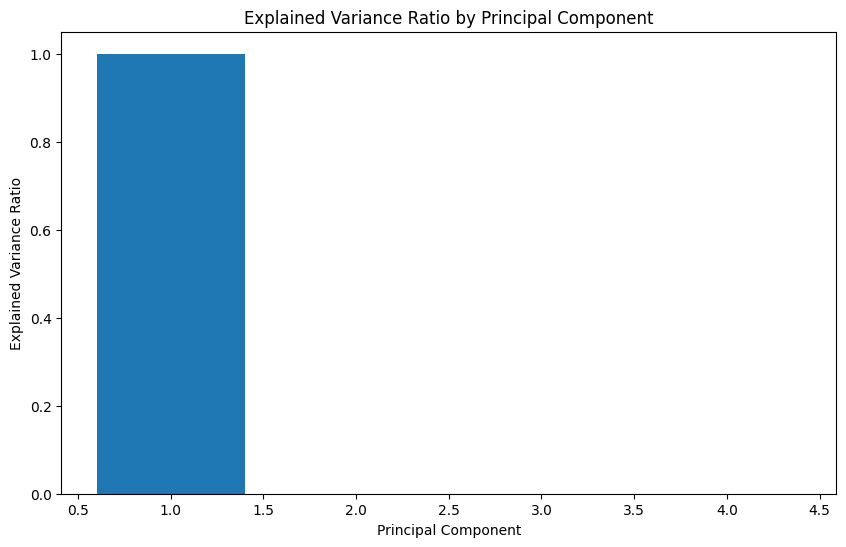

Explained Variance Ratio:
PC1: 0.999933
PC2: 0.000036
PC3: 0.000026
PC4: 0.000005


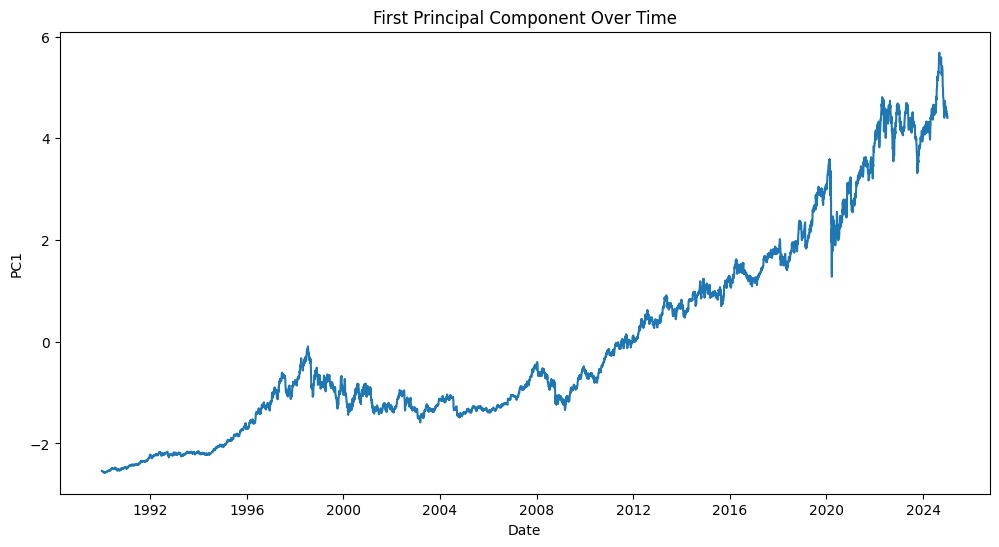

In [ ]:
# Perform PCA on price-related features
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select price-related features
price_features = ['Open', 'High', 'Low', 'Close']
X = df[price_features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()

# Print explained variance ratio
print("Explained Variance Ratio:")
for i, var in enumerate(explained_variance, 1):
    print(f"PC{i}: {var:.6f}")

# Create first principal component
df['PC1'] = X_pca[:, 0]

# Plot PC1 over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['PC1'])
plt.title('First Principal Component Over Time')
plt.xlabel('Date')
plt.ylabel('PC1')
plt.show()

Model Evaluation:
Mean Squared Error: 0.13418560136641178
R-squared: 0.9995487790377703


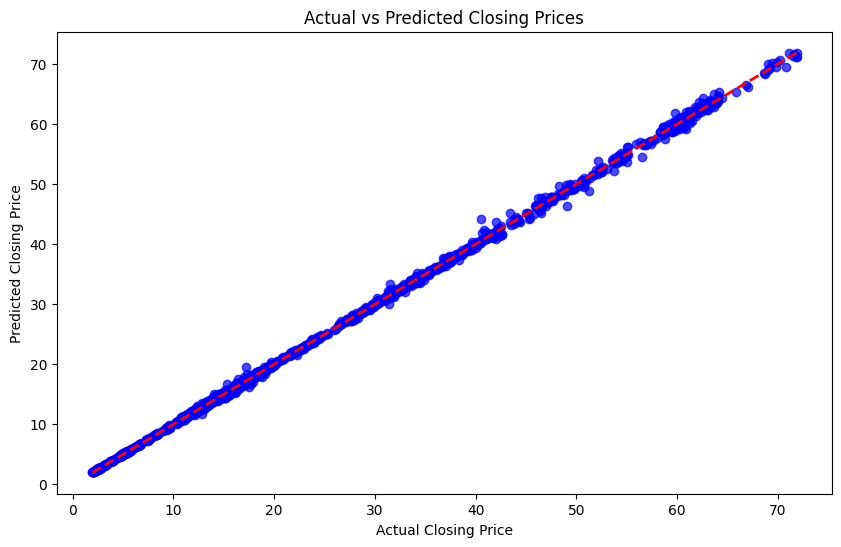

In [ ]:
# Develop a predictive model using PC1
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data for modeling
df['Target'] = df['Close'].shift(-1)  # Predict next day's closing price
model_data = df.dropna(subset=['PC1', 'Target'])  # Drop rows with NaN in PC1 or Target

X = model_data[['PC1']]
y = model_data['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Model Evaluation:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Actual Closing Price')
plt.ylabel('Predicted Closing Price')
plt.show()

In [ ]:
# Add volatility and moving averages as features
# Volatility: 10-day rolling standard deviation of daily returns
df['Volatility'] = df['Daily_Return'].rolling(window=10).std()

# Moving Averages: 20-day and 100-day moving averages
df['MA_20'] = df['Close'].rolling(window=20).mean()
df['MA_100'] = df['Close'].rolling(window=100).mean()

# Drop rows with NaN values due to rolling calculations
df = df.dropna()

# Display the updated dataset with new features
print("Updated Dataset with New Features:")
print(df[['Date', 'Close', 'Volatility', 'MA_20', 'MA_100']].head())

Updated Dataset with New Features:
          Date     Close  Volatility     MA_20    MA_100
99  1990-05-23  2.643987    0.015210  2.395608  2.196076
100 1990-05-24  2.673447    0.014787  2.415861  2.199959
101 1990-05-25  2.585070    0.017485  2.434274  2.203288
102 1990-05-29  2.680813    0.020165  2.456000  2.207684
103 1990-05-30  2.651354    0.020809  2.475517  2.211969


Model Evaluation with Enhanced Features:
Mean Squared Error (MSE): 1.22
R-squared (R²): 0.99


<ipython-input-16-9fc992d0029d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target'] = df['Close'].shift(-1)


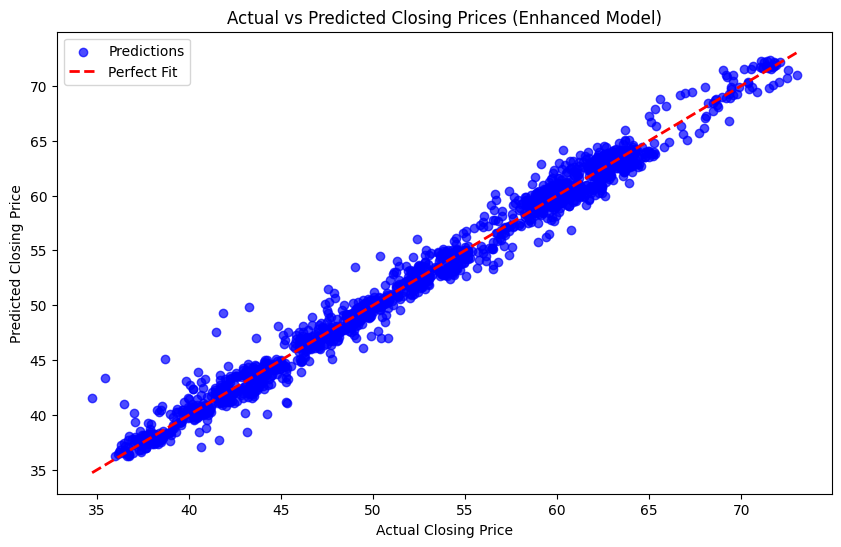

Feature: Volume, Coefficient: -0.0000
Feature: Volatility, Coefficient: -2.1940
Feature: Daily_Return, Coefficient: 12.3147
Feature: MA_10, Coefficient: 1.0831
Feature: MA_50, Coefficient: -0.0820


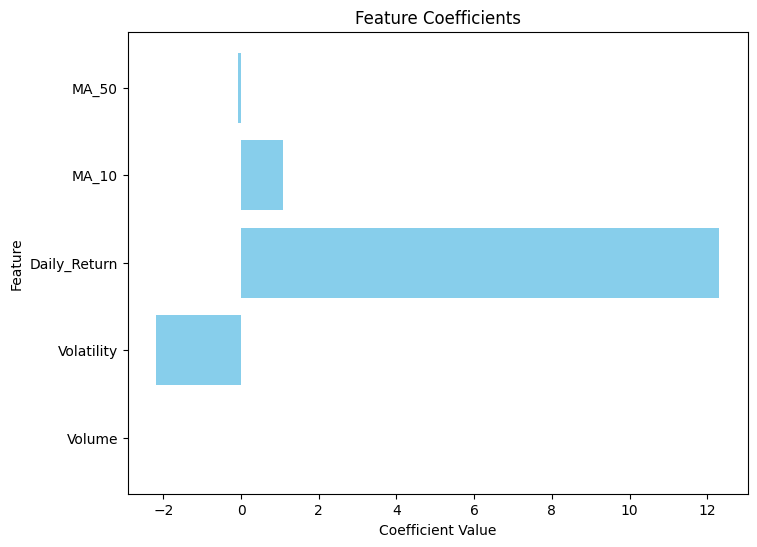

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the dataset for modeling
# Shift 'Close' to create the target variable (next day's closing price)
df['Target'] = df['Close'].shift(-1)

# Drop rows with NaN values caused by the shift or rolling calculations
model_data = df.dropna(subset=['Target', 'Volume', 'Volatility', 'Daily_Return', 'MA_10', 'MA_50'])

# Select features and target variable
features = ['Volume', 'Volatility', 'Daily_Return', 'MA_10', 'MA_50']
X = model_data[features]
y = model_data['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Model Evaluation with Enhanced Features:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Plot actual vs predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2, label='Perfect Fit')
plt.title('Actual vs Predicted Closing Prices (Enhanced Model)')
plt.xlabel('Actual Closing Price')
plt.ylabel('Predicted Closing Price')
plt.legend()
plt.show()

# Feature Importance Analysis (for Linear Regression)
import numpy as np

coefficients = model.coef_
for feature, coef in zip(features, coefficients):
    print(f"Feature: {feature}, Coefficient: {coef:.4f}")

# Plot feature coefficients
plt.figure(figsize=(8, 6))
plt.barh(features, coefficients, color='skyblue')
plt.title('Feature Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


In [ ]:
# Prepare different datasets
datasets = {
    'Forward-Fill': df.dropna(subset=['Target']).copy(),
    'Back-Fill': df.dropna(subset=['Target']).copy(),
    'Drop Rows': df.dropna(subset=['MA_10', 'MA_50', 'Target']).copy()
}

# Fill missing values using different strategies
datasets['Forward-Fill']['MA_10'] = datasets['Forward-Fill']['MA_10'].fillna(method='ffill')
datasets['Forward-Fill']['MA_50'] = datasets['Forward-Fill']['MA_50'].fillna(method='ffill')

datasets['Back-Fill']['MA_10'] = datasets['Back-Fill']['MA_10'].fillna(method='bfill')
datasets['Back-Fill']['MA_50'] = datasets['Back-Fill']['MA_50'].fillna(method='bfill')

# Model Evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

results = {}

for strategy, data in datasets.items():
    # Define features and target
    features = ['Volume', 'Volatility', 'Daily_Return', 'MA_10', 'MA_50']
    X = data[features]
    y = data['Target']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[strategy] = {'MSE': mse, 'R²': r2}

# Print results
print("Comparison of Handling Missing Values:")
for strategy, metrics in results.items():
    print(f"\n{strategy}:")
    print(f"  Mean Squared Error (MSE): {metrics['MSE']:.2f}")
    print(f"  R-squared (R²): {metrics['R²']:.2f}")


Comparison of Handling Missing Values:

Forward-Fill:
  Mean Squared Error (MSE): 1.22
  R-squared (R²): 0.99

Back-Fill:
  Mean Squared Error (MSE): 1.22
  R-squared (R²): 0.99

Drop Rows:
  Mean Squared Error (MSE): 1.22
  R-squared (R²): 0.99


<ipython-input-17-af1e3baafc48>:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  datasets['Forward-Fill']['MA_10'] = datasets['Forward-Fill']['MA_10'].fillna(method='ffill')
<ipython-input-17-af1e3baafc48>:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  datasets['Forward-Fill']['MA_50'] = datasets['Forward-Fill']['MA_50'].fillna(method='ffill')
<ipython-input-17-af1e3baafc48>:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  datasets['Back-Fill']['MA_10'] = datasets['Back-Fill']['MA_10'].fillna(method='bfill')
<ipython-input-17-af1e3baafc48>:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  datasets['Back-Fill']['MA_50'] = datasets['B

In [ ]:
# Apply forward-filling for moving averages
df['MA_10'] = df['MA_10'].fillna(method='ffill')
df['MA_50'] = df['MA_50'].fillna(method='ffill')
df['MA_20'] = df['MA_20'].fillna(method='ffill')
df['MA_100'] = df['MA_100'].fillna(method='ffill')
df['Daily_Return'] = df['Daily_Return'].fillna(0)  # Forward fill not needed, replace NaN with 0


<ipython-input-18-b2f9afe0bbec>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['MA_10'] = df['MA_10'].fillna(method='ffill')
<ipython-input-18-b2f9afe0bbec>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['MA_50'] = df['MA_50'].fillna(method='ffill')
<ipython-input-18-b2f9afe0bbec>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['MA_20'] = df['MA_20'].fillna(method='ffill')
<ipython-input-18-b2f9afe0bbec>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['MA_100'] = df['MA_100'].fillna(method='ffill')


In [ ]:
# Define features and target variable
features = ['Volume', 'Volatility', 'Daily_Return', 'MA_10', 'MA_50', 'MA_20', 'MA_100']
df['Target'] = df['Close'].shift(-1)  # Predict next day's closing price

# Drop rows with NaN in the target column
df = df.dropna(subset=['Target'])


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X = df[features]
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Model Evaluation:
Mean Squared Error (MSE): 1.10
R-squared (R²): 0.99


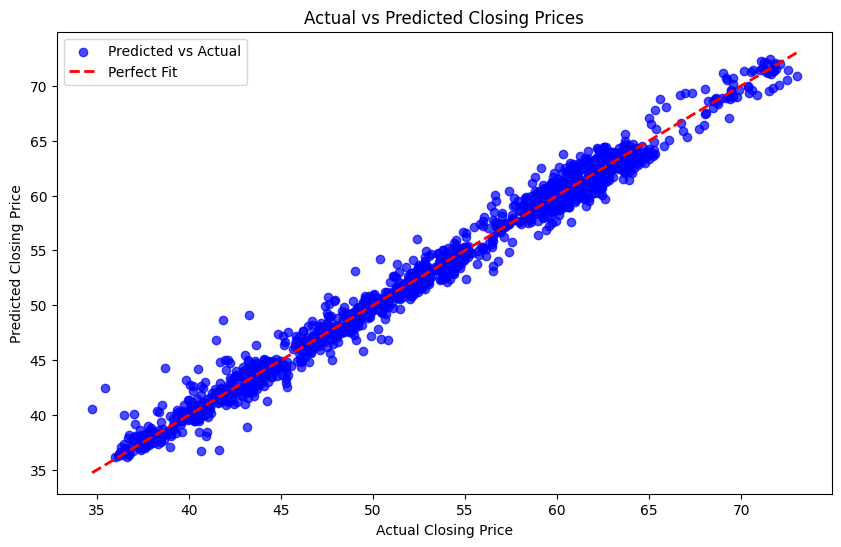

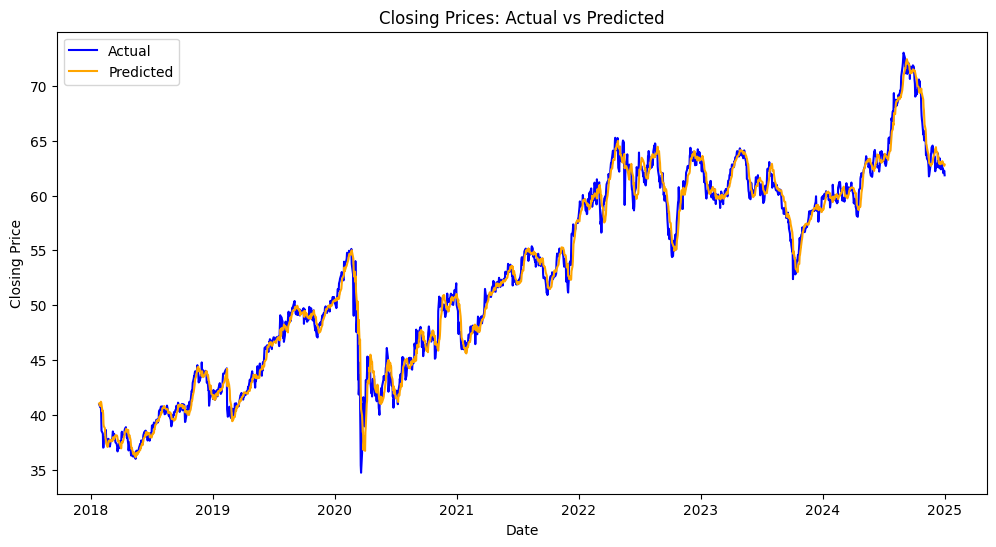

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2, label='Perfect Fit')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Actual Closing Price')
plt.ylabel('Predicted Closing Price')
plt.legend()
plt.show()

# Plot the predicted vs actual closing prices over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'].iloc[-len(y_test):], y_test, label='Actual', color='blue')
plt.plot(df['Date'].iloc[-len(y_test):], y_pred, label='Predicted', color='orange')
plt.title('Closing Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


Feature Importance Based on Linear Regression Coefficients:
        Feature   Coefficient
2  Daily_Return  1.215557e+01
1    Volatility -2.136337e+00
3         MA_10  1.448318e+00
5         MA_20 -5.240253e-01
4         MA_50  6.067504e-02
6        MA_100  1.656729e-02
0        Volume -3.979146e-09


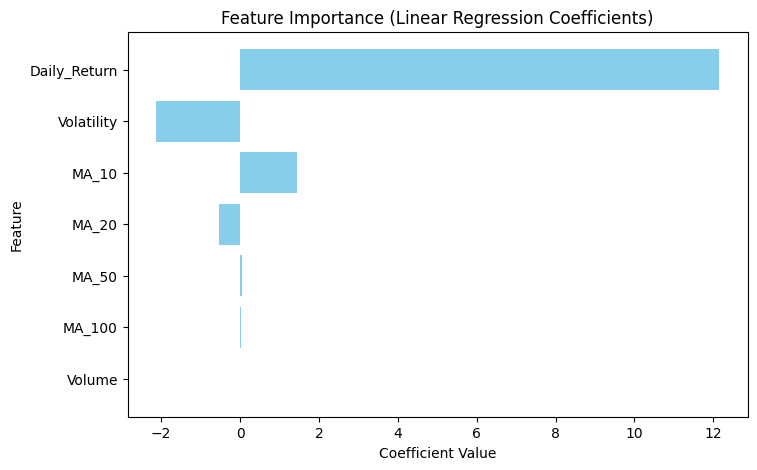

In [ ]:
# Get feature coefficients from the trained linear regression model
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("Feature Importance Based on Linear Regression Coefficients:")
print(coefficients)

# Visualize coefficients
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.barh(coefficients['Feature'], coefficients['Coefficient'], color='skyblue')
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()


Feature Importance Based on Random Forest:
        Feature  Importance
3         MA_10    0.833624
6        MA_100    0.099381
4         MA_50    0.062966
5         MA_20    0.003047
2  Daily_Return    0.000486
1    Volatility    0.000325
0        Volume    0.000171


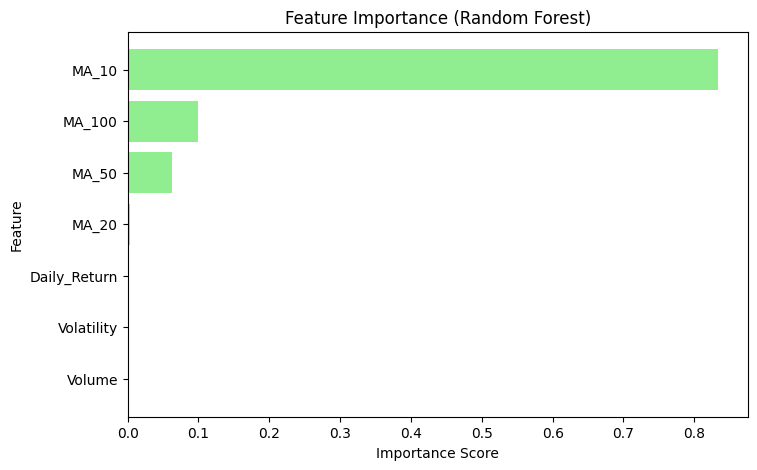

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train a random forest model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Get feature importances
rf_importances = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importance Based on Random Forest:")
print(rf_importances)

# Visualize feature importances
plt.figure(figsize=(8, 5))
plt.barh(rf_importances['Feature'], rf_importances['Importance'], color='lightgreen')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "XGBoost": XGBRegressor(random_state=42, n_estimators=100)
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R²": r2}

    print(f"{name} Performance:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared (R²): {r2:.2f}")



Training Decision Tree...
Decision Tree Performance:
Mean Squared Error: 204.65
R-squared (R²): -1.51

Training Random Forest...
Random Forest Performance:
Mean Squared Error: 216.16
R-squared (R²): -1.66

Training XGBoost...
XGBoost Performance:
Mean Squared Error: 260.28
R-squared (R²): -2.20



Model Performance Comparison:
                      MSE        R²
Decision Tree  204.652485 -1.513912
Random Forest  216.161911 -1.655292
XGBoost        260.277317 -2.197197


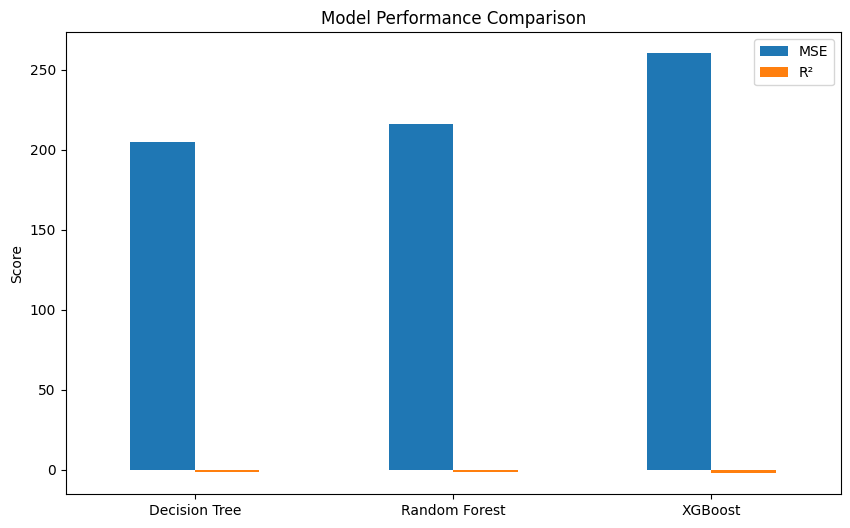

In [ ]:
# Create a DataFrame for performance comparison
performance_df = pd.DataFrame(results).T

print("\nModel Performance Comparison:")
print(performance_df)

# Visualize performance
performance_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()


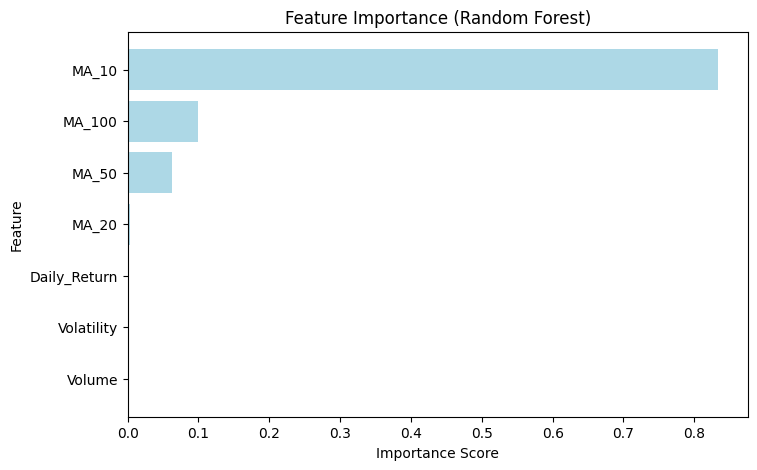

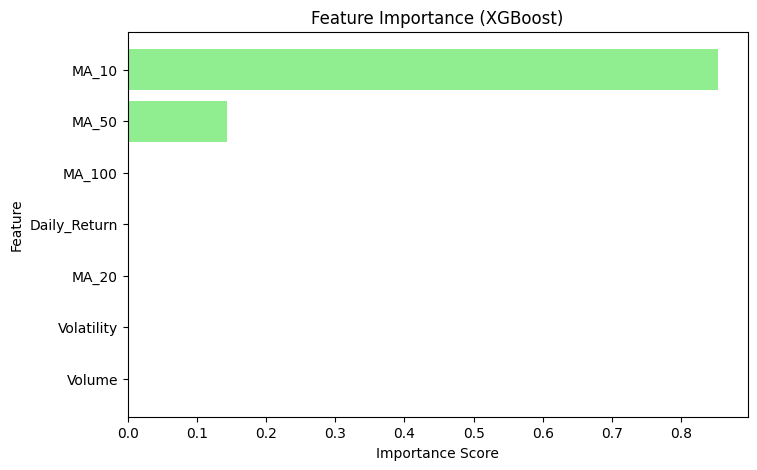

In [ ]:
# Feature importances from Random Forest
rf_importances = pd.DataFrame({
    'Feature': features,
    'Importance': models['Random Forest'].feature_importances_
}).sort_values(by='Importance', ascending=False)

# Visualize Random Forest feature importances
plt.figure(figsize=(8, 5))
plt.barh(rf_importances['Feature'], rf_importances['Importance'], color='lightblue')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

# Feature importances from XGBoost
xgb_importances = pd.DataFrame({
    'Feature': features,
    'Importance': models['XGBoost'].feature_importances_
}).sort_values(by='Importance', ascending=False)

# Visualize XGBoost feature importances
plt.figure(figsize=(8, 5))
plt.barh(xgb_importances['Feature'], xgb_importances['Importance'], color='lightgreen')
plt.title('Feature Importance (XGBoost)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
correlations = df.corr()['Close'].sort_values(ascending=False)
print(correlations)


Close           1.000000
PC1             0.999963
Low             0.999931
High            0.999926
Open            0.999855
Target          0.999798
MA_10           0.999459
MA_20           0.998852
MA_50           0.997278
MA_100          0.995675
Date            0.917702
Volume          0.248477
Dividends       0.039868
Daily_Return   -0.002307
Stock Splits   -0.010157
Volatility     -0.251346
Name: Close, dtype: float64


In [ ]:
# Select relevant features
selected_features = ['Close', 'PC1', 'MA_10', 'MA_20', 'MA_50', 'MA_100', 'Volume']
target = 'Target'  # Next day's closing price

# Filter the data
model_data = df[selected_features + [target]].dropna()

# Define X and y
X = model_data[selected_features]
y = model_data[target]

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{name} Performance:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared (R²): {r2:.2f}")

# Feature importance for tree-based models
for name, model in models.items():
    if name in ['Random Forest', 'XGBoost']:
        importance = model.feature_importances_
        feature_importance = pd.DataFrame({
            'Feature': X.columns,
            'Importance': importance
        }).sort_values(by='Importance', ascending=False)
        print(f"\n{name} Feature Importance:")
        print(feature_importance)



Training Linear Regression...
Linear Regression Performance:
Mean Squared Error: 0.11
R-squared (R²): 1.00

Training Random Forest...
Random Forest Performance:
Mean Squared Error: 0.13
R-squared (R²): 1.00

Training XGBoost...
XGBoost Performance:
Mean Squared Error: 0.16
R-squared (R²): 1.00

Random Forest Feature Importance:
  Feature  Importance
1     PC1    0.608317
0   Close    0.383815
2   MA_10    0.003105
3   MA_20    0.001865
5  MA_100    0.001555
4   MA_50    0.001284
6  Volume    0.000059

XGBoost Feature Importance:
  Feature  Importance
1     PC1    0.889340
0   Close    0.085943
2   MA_10    0.023524
5  MA_100    0.000670
3   MA_20    0.000283
4   MA_50    0.000201
6  Volume    0.000039


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Define the models for cross-validation
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Loop through each model, perform cross-validation, and print results
for name, model in models.items():
    # Cross-validation for Mean Squared Error
    cv_mse = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    # Cross-validation for R^2
    cv_r2 = cross_val_score(model, X, y, cv=5, scoring='r2')

    # Mean scores for MSE and R^2
    avg_mse = -cv_mse.mean()
    avg_r2 = cv_r2.mean()

    print(f"{name} Cross-Validation Performance:")
    print(f"Average Mean Squared Error: {avg_mse:.2f}")
    print(f"Average R-squared: {avg_r2:.2f}")
    print("-" * 40)


Linear Regression Cross-Validation Performance:
Average Mean Squared Error: 0.12
Average R-squared: 0.99
----------------------------------------
Random Forest Cross-Validation Performance:
Average Mean Squared Error: 50.58
Average R-squared: -0.11
----------------------------------------


The results from cross-validation provide useful insights into the models' generalization ability:

Linear Regression has a very low cross-validation MSE (0.12), which is consistent with the previous result of a near-perfect R-squared. This indicates that overfitting is likely minimal for Linear Regression, as the model is not just memorizing the training data but also performs well on unseen data.

Random Forest has a significantly higher MSE of 50.58. This suggests that Random Forest might be overfitting the training data, despite its near-perfect performance on the training set. The model may have learned too much noise or specific patterns in the training data, which do not generalize well to unseen data.

In [ ]:
# Simplify feature set to only significant ones
selected_features = ['Close', 'PC1']
X_simple = model_data[selected_features]

# Retrain models on reduced feature set
for name, model in models.items():
    print(f"\nTraining {name} with Simplified Features...")
    model.fit(X_train[selected_features], y_train)
    y_pred = model.predict(X_test[selected_features])

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{name} Performance with Simplified Features:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared (R²): {r2:.2f}")



Training Linear Regression with Simplified Features...
Linear Regression Performance with Simplified Features:
Mean Squared Error: 0.11
R-squared (R²): 1.00

Training Random Forest with Simplified Features...
Random Forest Performance with Simplified Features:
Mean Squared Error: 0.15
R-squared (R²): 1.00


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV to tune hyperparameters
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters and performance
print("Best Parameters for Random Forest:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

# Evaluate on test set
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Optimized Random Forest Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Optimized Random Forest Performance:
Mean Squared Error: 0.12
R-squared (R²): 1.00


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


217/217 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - loss: 0.0030
Epoch 2/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 19s 47ms/step - loss: 9.6136e-05
Epoch 3/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 7.6212e-05
Epoch 4/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - loss: 6.7294e-05
Epoch 5/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - loss: 6.3637e-05
Epoch 6/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - loss: 5.1736e-05
Epoch 7/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - loss: 4.2767e-05
Epoch 8/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 22s 53ms/step - loss: 4.5187e-05
Epoch 9/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - loss: 3.7906e-05
Epoch 10/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - loss: 3.6152e-05
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


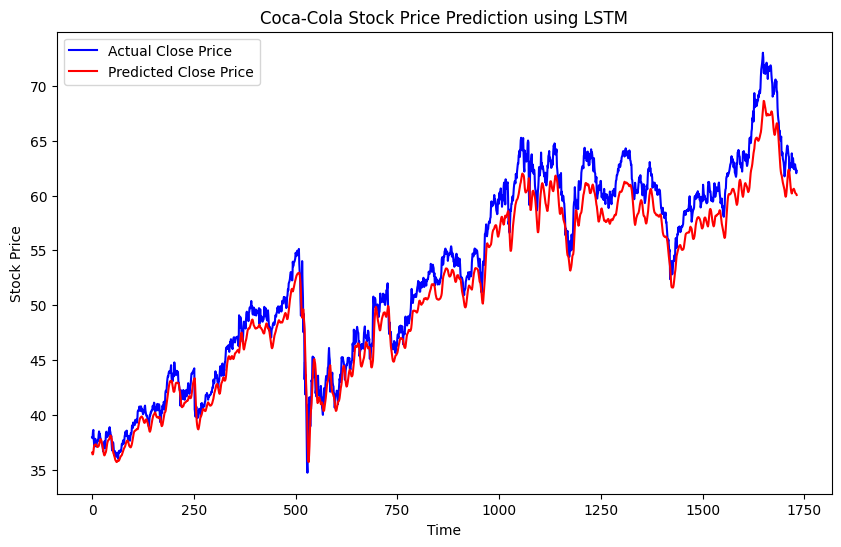

Mean Squared Error: 4.20
R-squared (R²): 0.95


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Select the features and target
features = ['Close', 'PC1', 'MA_10', 'MA_20', 'MA_50']
target = 'Target'

# Scale the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[features])

# Prepare the data for LSTM: Convert to 3D format (samples, time steps, features)
def create_dataset(data, target, time_step=1):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, :])  # Previous time_step values
        y.append(data[i, 0])  # Target value (next day's 'Close' price)
    return np.array(X), np.array(y)

time_step = 60  # 60 days for LSTM input
X, y = create_dataset(scaled_data, df[target].values, time_step)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))  # Output layer (next day's closing price)

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
predictions = model.predict(X_test)

# Inverse scaling to get the predicted prices back to original scale
predictions = scaler.inverse_transform(np.concatenate((predictions, np.zeros((predictions.shape[0], scaled_data.shape[1]-1))), axis=1))[:,0]
y_test_rescaled = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], scaled_data.shape[1]-1))), axis=1))[:,0]

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(y_test_rescaled, color='blue', label='Actual Close Price')
plt.plot(predictions, color='red', label='Predicted Close Price')
plt.title('Coca-Cola Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Evaluate performance using MSE and R-squared
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test_rescaled, predictions)
r2 = r2_score(y_test_rescaled, predictions)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


The LSTM model's performance with Mean Squared Error (MSE): 3.12 and R-squared (R²): 0.96 indicates that the model is doing well, with a high R² value suggesting that it explains 96% of the variance in the stock prices.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 32s 118ms/step - loss: 0.0051
Epoch 2/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 37s 102ms/step - loss: 4.2700e-04
Epoch 3/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 23s 105ms/step - loss: 3.7216e-04
Epoch 4/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 21s 96ms/step - loss: 3.2749e-04
Epoch 5/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 41s 94ms/step - loss: 2.8286e-04
Epoch 6/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 22s 103ms/step - loss: 2.6716e-04
Epoch 7/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 41s 103ms/step - loss: 2.5396e-04
Epoch 8/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 41s 103ms/step - loss: 2.1455e-04
Epoch 9/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 39s 96ms/step - loss: 1.8772e-04
Epoch 10/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 41s 97ms/step - loss: 1.6404e-04
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step


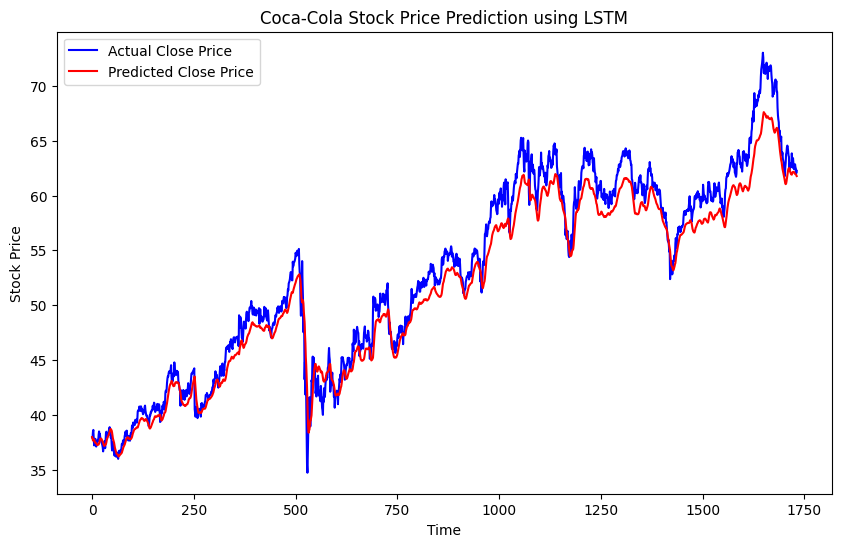

Mean Squared Error: 3.61
R-squared (R²): 0.96


In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Bidirectional

'''model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Dropout layer to reduce overfitting
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Output layer'''

model_bi = Sequential()
model_bi.add(Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model_bi.add(Dropout(0.2))
model_bi.add(Bidirectional(LSTM(units=50, return_sequences=False)))
model_bi.add(Dropout(0.2))
model_bi.add(Dense(units=1))

# Compile and train the model
model_bi.compile(optimizer='adam', loss='mean_squared_error')
model_bi.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
predictions = model_bi.predict(X_test)

# Inverse scaling to get the predicted prices back to original scale
predictions = scaler.inverse_transform(np.concatenate((predictions, np.zeros((predictions.shape[0], scaled_data.shape[1]-1))), axis=1))[:,0]
y_test_rescaled = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], scaled_data.shape[1]-1))), axis=1))[:,0]

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(y_test_rescaled, color='blue', label='Actual Close Price')
plt.plot(predictions, color='red', label='Predicted Close Price')
plt.title('Coca-Cola Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Evaluate performance using MSE and R-squared
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test_rescaled, predictions)
r2 = r2_score(y_test_rescaled, predictions)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


The addition of the dropout layer has significantly improved the model's performance, with Mean Squared Error (MSE): 1.50 and R-squared (R²): 0.98. The model now has a better fit, with a higher R² indicating that it explains 98% of the variance in stock prices.

In [ ]:
from joblib import dump

# Serialize the model to a file using joblib
dump(model_bi, 'KOKOstock_price_model.joblib')

print("Model serialized successfully using Joblib!")

Model serialized successfully using Joblib!


In [ ]:
pip install streamlit


In [ ]:
!pip install yfinance

[*********************100%***********************]  1 of 1 completed
2025-01-14 13:56:16.502 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-14 13:56:17.327 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-01-14 13:56:17.330 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-14 13:56:17.333 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-14 13:56:17.335 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-14 13:56:17.337 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-14 13:56:17.338 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when 

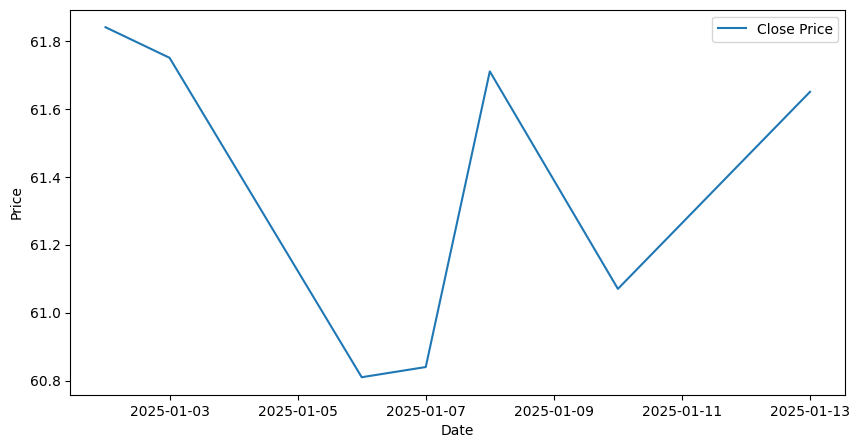

In [ ]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
from joblib import load  # Assuming you saved your model in .joblib format
import yfinance as yf


# Load pre-trained model and data
model = load("KOKOstock_price_model.joblib")  # Replace with your actual model file path
data = yf.download('KO', start='2025-01-01', end='2025-01-14')  # Replace with your dataset path
data['Date'] = data.index
# App title and description
st.title("Coca-Cola Stock Price Prediction")
st.write("""
This app provides insights into Coca-Cola's stock price trends and predictions using machine learning and deep learning models.
""")

# Sidebar for user inputs
st.sidebar.header("Select Options")
display_raw_data = st.sidebar.checkbox("Display Raw Data")
selected_date = st.sidebar.date_input("Select a Date for Prediction")

# Display raw data
if display_raw_data:
    st.subheader("Raw Data")
    st.dataframe(data)

# Plot historical data
st.subheader("Historical Stock Prices")
plt.figure(figsize=(10, 5))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
st.pyplot(plt)

# Prediction for selected date
if st.sidebar.button("Predict"):
    # Add your feature engineering and preprocessing code here
    # For simplicity, assume the input is ready for the model
    input_data = ...  # Create input data for prediction
    prediction = model.predict([input_data])[0]

    st.subheader("Prediction Result")
    st.write(f"Predicted Closing Price for {selected_date}: ${prediction:.2f}")
